In [3]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
import scipy.stats as st
from scipy.stats import linregress
import scipy.stats as stats

In [4]:
# Census & gmaps API Keys
from config import (api_key, gkey)

# Configure gmaps
gmaps.configure(api_key=gkey)

In [8]:
# Run Census Search to retrieve data on all states
# GROUP = "B25071"
#MEDIAN GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS (DOLLARS)

years=[2013,2014,2015,2016,2017,2018]

# Names for your columns

#Jenifer
column1 = "Population"
column2 = "Per Capita Income"
column3 = "Poverty Count"
#Natalia
column4 = "Rent(%)" #Median Rent as a Percentage of Houshold Income
column5 = "House with mortgage(%)" #Median Owner Cost for House WITH Mortgage as a Percentage of Houshold Income 
column6 = "House without mortgage(%)" #Median Owner Cost for House WITHOUT Mortgage as a Percentage of Houshold Income 
#Hossein
column7 = "Mean of Trans by Age"
column8 = "Travel Time to Work"
#Daniel (Race part)
column9 = "Race Total"
column10 = "White alone"
column11 = "Block or African American alone"
column12 = "American Indian and Alaska Native Alone"
column13 = "Asian Alone"
column14 = "Unemployement count"

median_rent_pd = pd.DataFrame()
all_years_df = pd.DataFrame()

states_list=[]
years_list=[]

column1_data =[]
column2_data =[]
column3_data =[]
column4_data =[]
column5_data =[]
column6_data =[]
column7_data =[]
column8_data =[]
column9_data =[]
column10_data =[]
column11_data =[]
column12_data =[]
column13_data =[]
column14_data =[]

state_number = []


for y in years:
    
    c = Census(api_key, year=y)
    
    #Give Names for your Groups
    median_rent_data = c.acs5.get(("NAME", "B01003_001E","B19301_001E", "B17001_002E", 
                                   "B25071_001E","B25092_002E", "B25092_003E",
                                  "B08101_001E", "B08303_001E",
                                  "B02001_001E", "B02001_002E", "B02001_003E", "B02001_004E","B02001_005E","B23025_005E"), 
                         {'for': 'state: 06, 08, 12, 16, 41, 48'})
    
        #To assing yeach value with specific year


    # Sorting to put states in the same order states in the table
    median_rent_pd = pd.DataFrame(median_rent_data).sort_values("NAME",ascending=True)
    median_rent_pd = median_rent_pd.reset_index()
    #print(median_rent_pd)
    
    year_column=[]
    for i in range(len(median_rent_pd["state"])):
        year_column.append(y)
    #print(year_column)
    
    #Adding all data into lists
    state_number.extend(median_rent_pd["state"].tolist())
    states_list.extend(median_rent_pd["NAME"].tolist())
    years_list.extend(year_column)
    column1_data.extend(median_rent_pd["B01003_001E"].tolist())
    column2_data.extend(median_rent_pd["B19301_001E"].tolist())
    column3_data.extend(median_rent_pd["B17001_002E"].tolist())
    column4_data.extend(median_rent_pd["B25071_001E"].tolist())
    column5_data.extend(median_rent_pd["B25092_002E"].tolist())
    column6_data.extend(median_rent_pd["B25092_003E"].tolist())
    column7_data.extend(median_rent_pd["B08101_001E"].tolist())
    column8_data.extend(median_rent_pd["B08303_001E"].tolist())
    column9_data.extend(median_rent_pd["B02001_001E"].tolist())
    column10_data.extend(median_rent_pd["B02001_002E"].tolist())
    column11_data.extend(median_rent_pd["B02001_003E"].tolist())
    column12_data.extend(median_rent_pd["B02001_004E"].tolist())
    column13_data.extend(median_rent_pd["B02001_005E"].tolist())
    column14_data.extend(median_rent_pd["B23025_005E"].tolist())    
    
    
#print(years_list)
#print(states_list)

all_years_df["Year"] = years_list
all_years_df["State Name"] = states_list
all_years_df["State Number"] = state_number
all_years_df[column1] = column1_data
all_years_df[column2] = column2_data
all_years_df[column3] = column3_data
all_years_df[column4] = column4_data
all_years_df[column5] = column5_data
all_years_df[column6] = column6_data
all_years_df[column7] = column7_data
all_years_df[column8] = column8_data

all_years_df[column9] = column9_data
all_years_df[column10] = column10_data
all_years_df[column11] = column11_data
all_years_df[column12] = column12_data
all_years_df[column13] = column13_data
all_years_df[column14] = column14_data

all_years_df.head()
#print(states_list)

,Year,State Name,State Number,Population,Per Capita Income,Poverty Count,Rent(%),House with mortgage(%),House without mortgage(%),Mean of Trans by Age,Travel Time to Work,Race Total,White alone,Block or African American alone,American Indian and Alaska Native Alone,Asian Alone,Unemployement count
0,2013,California,06,37659181.0,29527.0,5885417.0,33.7,29.2,11.3,16290887.0,15437979.0,37659181.0,23467167.0,2255372.0,286397.0,5005635.0,2168665.0
1,2013,Colorado,08,5119329.0,31109.0,660874.0,30.9,24.0,10.2,2494794.0,2331060.0,5119329.0,4301096.0,203755.0,49177.0,141719.0,231741.0
2,2013,Florida,12,19091156.0,26236.0,3052807.0,34.9,28.0,13.6,8094220.0,7706393.0,19091156.0,14568521.0,3056152.0,58390.0,475905.0,1096028.0
3,2013,Idaho,16,1583364.0,22568.0,240298.0,29.8,24.1,10.2,684393.0,645127.0,1583364.0,1455692.0,8957.0,19984.0,20141.0,67189.0
4,2013,Oregon,41,3868721.0,26809.0,614778.0,32.2,26.2,12.8,1700451.0,1591348.0,3868721.0,3297149.0,70328.0,47411.0,147986.0,221191.0


In [9]:
# Adding Migration Data per state for 2013-2018
# Migration in US
# Study data files
migration_file_path = "Total_Migration_2013-2018_CSV.csv"

# Read the mouse data and the study results
migration_all_states_df = pd.read_csv(migration_file_path)
migration_all_states_df.head()

,Year,State Name,Move In,Move Out,Delta
0,2013.0,Alabama,104102.0,97219.0,6883.0
1,2013.0,Alaska,34360.0,99931.0,-65571.0
2,2013.0,Arizona,236146.0,183178.0,52968.0
3,2013.0,Arkansas,70621.0,76963.0,-6342.0
4,2013.0,California,485477.0,581679.0,-96202.0


In [13]:
# Combine the two dataframes into a single dataset
merge_data_df = pd.merge(all_years_df,migration_all_states_df, on=["Year","State Name"])
merge_data_df.head(12)

,Year,State Name,State Number,Population,Per Capita Income,Poverty Count,Rent(%),House with mortgage(%),House without mortgage(%),Mean of Trans by Age,Travel Time to Work,Race Total,White alone,Block or African American alone,American Indian and Alaska Native Alone,Asian Alone,Unemployement count,Move In,Move Out,Delta
0,2013,California,06,37659181.0,29527.0,5885417.0,33.7,29.2,11.3,16290887.0,15437979.0,37659181.0,23467167.0,2255372.0,286397.0,5005635.0,2168665.0,485477.0,581679.0,-96202.0
1,2013,Colorado,08,5119329.0,31109.0,660874.0,30.9,24.0,10.2,2494794.0,2331060.0,5119329.0,4301096.0,203755.0,49177.0,141719.0,231741.0,206543.0,166348.0,40195.0
2,2013,Florida,12,19091156.0,26236.0,3052807.0,34.9,28.0,13.6,8094220.0,7706393.0,19091156.0,14568521.0,3056152.0,58390.0,475905.0,1096028.0,529406.0,423995.0,105411.0
3,2013,Idaho,16,1583364.0,22568.0,240298.0,29.8,24.1,10.2,684393.0,645127.0,1583364.0,1455692.0,8957.0,19984.0,20141.0,67189.0,61592.0,63788.0,-2196.0
4,2013,Oregon,41,3868721.0,26809.0,614778.0,32.2,26.2,12.8,1700451.0,1591348.0,3868721.0,3297149.0,70328.0,47411.0,147986.0,221191.0,143841.0,111680.0,32161.0
5,2013,Texas,48,25639373.0,26019.0,4416829.0,29.6,22.5,12.0,11445014.0,10983502.0,25639373.0,19075100.0,3030970.0,129219.0,1019260.0,1020132.0,548034.0,409977.0,138057.0
6,2014,California,06,38066920.0,29906.0,6115244.0,33.8,28.3,11.3,16529777.0,15658667.0,38066920.0,23650913.0,2262323.0,287360.0,5130536.0,2084564.0,513968.0,593308.0,-79340.0
7,2014,Colorado,08,5197580.0,31674.0,663861.0,30.8,23.5,10.1,2544021.0,2377653.0,5197580.0,4364911.0,209062.0,49917.0,146561.0,219241.0,218728.0,173332.0,45396.0
8,2014,Florida,12,19361792.0,26499.0,3159259.0,34.7,26.9,13.3,8228557.0,7823816.0,19361792.0,14747196.0,3114841.0,59121.0,490833.0,1024905.0,546501.0,437516.0,108985.0
9,2014,Idaho,16,1599464.0,23087.0,244618.0,29.7,23.4,10.0,691425.0,650493.0,1599464.0,1468732.0,9334.0,20363.0,21749.0,61837.0,64633.0,56887.0,7746.0


In [16]:
#Column rearrangment
merge_data_df_migration = merge_data_df[['Year','State Name','State Number','Population','Move In','Move Out','Delta','Per Capita Income','Poverty Count','Rent(%)',
 'House with mortgage(%)','House without mortgage(%)','Mean of Trans by Age','Travel Time to Work','Race Total','White alone',
 'Block or African American alone','American Indian and Alaska Native Alone','Asian Alone','Unemployement count']]
merge_data_df_migration.head()

,Year,State Name,State Number,Population,Move In,Move Out,Delta,Per Capita Income,Poverty Count,Rent(%),House with mortgage(%),House without mortgage(%),Mean of Trans by Age,Travel Time to Work,Race Total,White alone,Block or African American alone,American Indian and Alaska Native Alone,Asian Alone,Unemployement count
0,2013,California,06,37659181.0,485477.0,581679.0,-96202.0,29527.0,5885417.0,33.7,29.2,11.3,16290887.0,15437979.0,37659181.0,23467167.0,2255372.0,286397.0,5005635.0,2168665.0
1,2013,Colorado,08,5119329.0,206543.0,166348.0,40195.0,31109.0,660874.0,30.9,24.0,10.2,2494794.0,2331060.0,5119329.0,4301096.0,203755.0,49177.0,141719.0,231741.0
2,2013,Florida,12,19091156.0,529406.0,423995.0,105411.0,26236.0,3052807.0,34.9,28.0,13.6,8094220.0,7706393.0,19091156.0,14568521.0,3056152.0,58390.0,475905.0,1096028.0
3,2013,Idaho,16,1583364.0,61592.0,63788.0,-2196.0,22568.0,240298.0,29.8,24.1,10.2,684393.0,645127.0,1583364.0,1455692.0,8957.0,19984.0,20141.0,67189.0
4,2013,Oregon,41,3868721.0,143841.0,111680.0,32161.0,26809.0,614778.0,32.2,26.2,12.8,1700451.0,1591348.0,3868721.0,3297149.0,70328.0,47411.0,147986.0,221191.0


In [22]:
#Writing DafaFrame to CSV file
merge_data_df_migration.to_csv("all_census_data.csv",index=False)

In [35]:
all_census_data = merge_data_df_migration

In [37]:
cal_all_years = all_census_data.loc[all_census_data["State Name"]=="California"]

colorado_all_years = all_census_data.loc[all_census_data["State Name"]=="Colorado"]

florida_all_years = all_census_data.loc[all_census_data["State Name"]=="Florida"]

idaho_all_years = all_census_data.loc[all_census_data["State Name"]=="Idaho"]

oregon_all_years = all_census_data.loc[all_census_data["State Name"]=="Oregon"]

texas_all_years = all_census_data.loc[all_census_data["State Name"]=="Texas"]


cal_all_years

,Year,State Name,State Number,Population,Move In,Move Out,Delta,Per Capita Income,Poverty Count,Rent(%),House with mortgage(%),House without mortgage(%),Mean of Trans by Age,Travel Time to Work,Race Total,White alone,Block or African American alone,American Indian and Alaska Native Alone,Asian Alone,Unemployement count
0,2013,California,06,37659181.0,485477.0,581679.0,-96202.0,29527.0,5885417.0,33.7,29.2,11.3,16290887.0,15437979.0,37659181.0,23467167.0,2255372.0,286397.0,5005635.0,2168665.0
6,2014,California,06,38066920.0,513968.0,593308.0,-79340.0,29906.0,6115244.0,33.8,28.3,11.3,16529777.0,15658667.0,38066920.0,23650913.0,2262323.0,287360.0,5130536.0,2084564.0
12,2015,California,06,38421464.0,514477.0,643710.0,-129233.0,30318.0,6135142.0,33.7,27.3,11.2,16869052.0,15968724.0,38421464.0,23747013.0,2265387.0,287028.0,5261978.0,1891081.0
18,2016,California,06,38654206.0,514758.0,657690.0,-142932.0,31458.0,6004257.0,33.4,26.5,11.1,17193695.0,16259259.0,38654206.0,23680584.0,2261835.0,285512.0,5354608.0,1683726.0
24,2017,California,06,38982847.0,523131.0,661026.0,-137895.0,33128.0,5773408.0,33.1,25.9,11.0,17589758.0,16611711.0,38982847.0,23607242.0,2263222.0,292018.0,5503672.0,1491146.0
30,2018,California,06,39148760.0,501023.0,691145.0,-190122.0,35021.0,5487141.0,32.8,25.5,11.0,17904213.0,16883403.0,39148760.0,23529068.0,2267875.0,296475.0,5604339.0,1321502.0


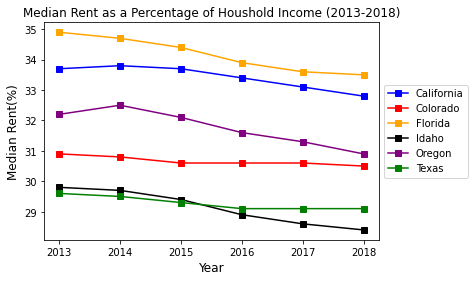

In [65]:
#Rent

x_axis = cal_all_years["Year"]
y_axis_ca = cal_all_years["Rent(%)"]
y_axis_co = colorado_all_years["Rent(%)"]
y_axis_fl = florida_all_years["Rent(%)"]
y_axis_id = idaho_all_years["Rent(%)"]
y_axis_or = oregon_all_years["Rent(%)"]
y_axis_tx = texas_all_years["Rent(%)"]

california, = plt.plot(x_axis, y_axis_ca, marker="s",color="blue", label="California")
colorado, = plt.plot(x_axis, y_axis_co, marker="s",color="red", label="Colorado")
florida, = plt.plot(x_axis, y_axis_fl, marker="s",color="orange", label="Florida")
idaho, = plt.plot(x_axis, y_axis_id, marker="s",color="black", label="Idaho")
oregon, = plt.plot(x_axis, y_axis_or, marker="s",color="purple", label="Oregon")
texas, = plt.plot(x_axis, y_axis_tx, marker="s",color="green", label="Texas")

plt.title('Median Rent as a Percentage of Houshold Income (2013-2018)',fontsize=(12))
plt.ylabel('Median Rent(%)',fontsize=(12))
plt.xlabel('Year',fontsize=(12))

# Set our legend to where the chart thinks is best
plt.legend(handles=[california, colorado, florida, idaho, oregon, texas], loc="center left", bbox_to_anchor=(1, 0.5))

# Save the plotted figure as .pngs
plt.savefig("Images/Median_Rent_as_Percentage_of_Houshold_Income.png",bbox_inches='tight')

plt.show()

In [ ]:
#Conclusion #1: Both CA and FL have higer Rent. The cheapest state to rent id Idaho.

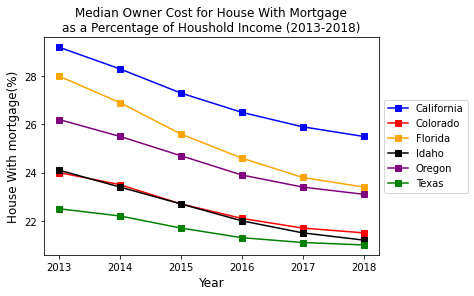

In [64]:
#Own cost House with Mortgage
#Rent

x_axis = cal_all_years["Year"]
y_axis_ca = cal_all_years["House with mortgage(%)"]
y_axis_co = colorado_all_years["House with mortgage(%)"]
y_axis_fl = florida_all_years["House with mortgage(%)"]
y_axis_id = idaho_all_years["House with mortgage(%)"]
y_axis_or = oregon_all_years["House with mortgage(%)"]
y_axis_tx = texas_all_years["House with mortgage(%)"]

california, = plt.plot(x_axis, y_axis_ca, marker="s",color="blue", label="California")
colorado, = plt.plot(x_axis, y_axis_co, marker="s",color="red", label="Colorado")
florida, = plt.plot(x_axis, y_axis_fl, marker="s",color="orange", label="Florida")
idaho, = plt.plot(x_axis, y_axis_id, marker="s",color="black", label="Idaho")
oregon, = plt.plot(x_axis, y_axis_or, marker="s",color="purple", label="Oregon")
texas, = plt.plot(x_axis, y_axis_tx, marker="s",color="green", label="Texas")

plt.title('Median Owner Cost for House With Mortgage\n'+'as a Percentage of Houshold Income (2013-2018)',fontsize=(12))
plt.ylabel('House With mortgage(%)',fontsize=(12))
plt.xlabel('Year',fontsize=(12))

# Set our legend to where the chart thinks is best
plt.legend(handles=[california, colorado, florida, idaho, oregon, texas], loc="center left", bbox_to_anchor=(1, 0.5))

# Save the plotted figure as .pngs
plt.savefig("Images/Median_Owner_Cost_for_House_With_Mortgage.png",bbox_inches='tight')

plt.show()

In [ ]:
#Conclusion #2: All considered states can be separated by three main groups: California the most expensive statae to buy a house with mortgage.
#The less expecive is CO, ID and TX, and became very close to each other in 2018. 
#Fl and OR are between. 

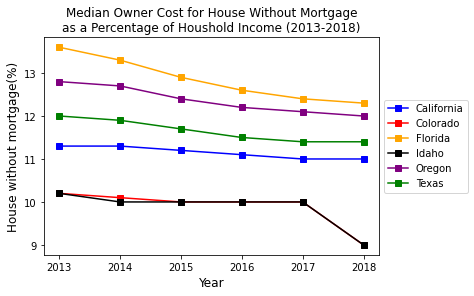

In [66]:
#Own cost House with Mortgage
#Rent

x_axis = cal_all_years["Year"]
y_axis_ca = cal_all_years["House without mortgage(%)"]
y_axis_co = colorado_all_years["House without mortgage(%)"]
y_axis_fl = florida_all_years["House without mortgage(%)"]
y_axis_id = idaho_all_years["House without mortgage(%)"]
y_axis_or = oregon_all_years["House without mortgage(%)"]
y_axis_tx = texas_all_years["House without mortgage(%)"]

california, = plt.plot(x_axis, y_axis_ca, marker="s",color="blue", label="California")
colorado, = plt.plot(x_axis, y_axis_co, marker="s",color="red", label="Colorado")
florida, = plt.plot(x_axis, y_axis_fl, marker="s",color="orange", label="Florida")
idaho, = plt.plot(x_axis, y_axis_id, marker="s",color="black", label="Idaho")
oregon, = plt.plot(x_axis, y_axis_or, marker="s",color="purple", label="Oregon")
texas, = plt.plot(x_axis, y_axis_tx, marker="s",color="green", label="Texas")

plt.title('Median Owner Cost for House Without Mortgage\n'+'as a Percentage of Houshold Income (2013-2018)',fontsize=(12))
plt.ylabel('House without mortgage(%)',fontsize=(12))
plt.xlabel('Year',fontsize=(12))

# Set our legend to where the chart thinks is best
plt.legend(handles=[california, colorado, florida, idaho, oregon, texas], loc="center left", bbox_to_anchor=(1, 0.5))

# Save the plotted figure as .pngs
plt.savefig("Images/Median_Owner_Cost_for_House_Without_Mortgage.png",bbox_inches='tight')

plt.show()

In [ ]:
#Conclusion #3: Situation is changed significantly if we consider the Owner Costs for the House without Mortgage.
#In this case, Fl and Oregon are the most expecive states.
#The most attractive states to have property is ID and CO.